In [31]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as pltcm
import seaborn as sns

In [32]:
# Configure libraries
sns.set()

# Round decimals when displaying DataFrames
pd.set_option('precision', 4)

In [33]:
# load dataset
billboardWeekly = pd.read_csv('billboardHotWeekly.csv')

In [34]:
# create a new dictionary and store the max number of weeks on chart for each song/instance
dictSortIndex = {}
# number of songs that have been #1 on the list
peakList = []
for row in billboardWeekly.itertuples():
    # save to peak1 list
    if row.PeakPosition == 1:
        if not (row.SongID in peakList):
            peakList.append(row.SongID)
    # max weeks_on_chart
    if row.SongID in dictSortIndex.keys():
        if row.Instance in ((dictSortIndex[row.SongID]).keys()):
            if (dictSortIndex[row.SongID])[row.Instance] < row.WeeksOnChart:
                (dictSortIndex[row.SongID])[row.Instance] = row.WeeksOnChart
        else:
            (dictSortIndex[row.SongID])[row.Instance] = row.WeeksOnChart
    else:
        dictSortIndex[row.SongID] = {}
        (dictSortIndex[row.SongID])[row.Instance] = row.WeeksOnChart


In [35]:
# This is for songs that have reached the #1 on the chart
numOne = {}
for key in peakList:
    yr = billboardWeekly[billboardWeekly.SongID == key].WeekID.iloc[0].split('/')[2]
    if(yr in numOne.keys()):
        numOne[yr] += 1
    else:
        numOne[yr] = 1
print(numOne)

{'1989': 30, '1988': 29, '1985': 26, '1958': 8, '1995': 11, '1997': 11, '2006': 16, '2009': 13, '2011': 11, '2012': 10, '2014': 8, '2016': 10, '2017': 10, '2018': 13, '2019': 3, '1966': 25, '1990': 30, '1964': 22, '1967': 20, '1965': 26, '1987': 30, '1974': 34, '1982': 16, '1998': 15, '2004': 11, '2005': 10, '2010': 21, '2013': 11, '2015': 8, '1963': 21, '1968': 14, '1969': 19, '1970': 20, '1975': 38, '1992': 9, '1994': 8, '1999': 15, '2007': 17, '2008': 14, '1959': 17, '1962': 19, '1972': 21, '1976': 27, '1977': 23, '1978': 19, '1979': 25, '1980': 14, '1981': 16, '1983': 15, '1984': 21, '1986': 31, '1993': 11, '2000': 16, '2002': 9, '2003': 10, '1991': 25, '2001': 12, '1961': 19, '1960': 20, '1996': 7, '1971': 18, '1973': 31}


    Year  Songs
3   1958      8
39  1959     17
58  1960     20
57  1961     19
40  1962     19
..   ...    ...
28  2015      8
11  2016     10
12  2017     10
13  2018     13
14  2019      3

[62 rows x 2 columns]


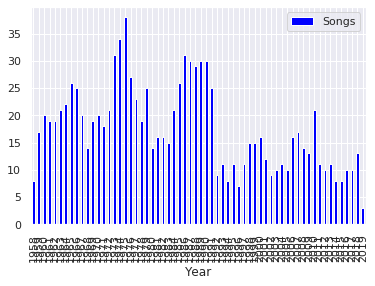

In [36]:
# histogram to map year against number of songs reaching number 1
data = {'Year': list(numOne.keys()), 'Songs': list(numOne.values())}
numOneDF = pd.DataFrame(data)
numOneDF = numOneDF.sort_values("Year")
print(numOneDF)
numOneDF.plot(kind='bar', x= 'Year', y='Songs', color='blue')
plt.savefig('YEARSx#SONGSREACHINGNUM1')
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


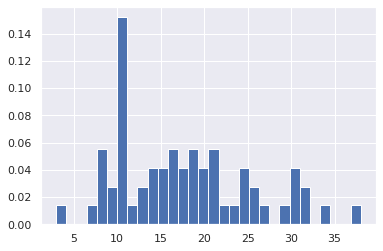

38

In [37]:
x = numOneDF['Songs']
plt.hist(x, normed=True, bins=30)
plt.savefig('YEARSx#SONGSREACHINGNUM1HIST')
plt.show()
#x.mean()
#x.median()
#x.mode()
x.max()

This histogram shows the distribution of songs as grouped by year, to see whatthe typical year has in terms of number of songs per year. The mean number of songs that hit #1 per year is 17.56, while the median is 16. 

This skew is primarily due to the maximum of 38, which skews the data toward higher numbers of songs per year due to outlying years. The mode of 11 is extremely prevalent, with over 14% of all years containing exactly 11 #1 singles on the Billboard Top 100.

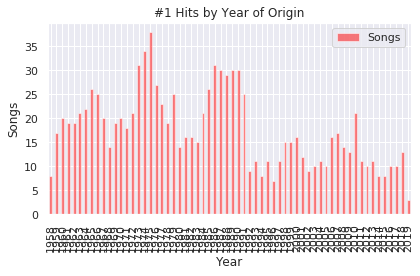

In [38]:
# is there a way to combine bars of the graph (ex. grouping of 5 years)
# or do I actually have to manipulate the data?
numOneDF.plot(kind='bar', x= 'Year', y='Songs', color='red', alpha=0.5)
plt.savefig('YEARSx#SONGSREACHINGNUM1')
plt.ylabel('Songs')
plt.title('#1 Hits by Year of Origin')
plt.tight_layout()
plt.show()

This data illustrates the relationship between the number of songs reaching the #1 spot on the Billboard Weekly Top 100 at least once, and the songs' years of origin. Interestingly, this data is relatively bell-shaped, with a peak in 1975 of over 35 songs that would at different points in time appear on the Billboard Top 100 Charts in the #1 spot. Additionally, there is a trend of this number sharply decreasing over time; in 2016, there were less than 10 songs that made it to #1 on the charts. 

There are many factors that could create this phenomenon, one of which issimply the increasing divide between "viralness" and "popularity" as opposed to normality. As social media has influenced what consumers can see, viral trends such as Lil Nas X's "Old Town Road" have jumped into popularity--and stayed there, in the #1 spot, for weeks on end. Because these extremely popular songs remain in the spot for so long, despite the increasing globalization and diversity of the music industry, most songs will never make it into that spot of #1 because it is taken by long-lasting songs. 

## show that old town road is the longest lasting top 100 song as numer 1

In [39]:
# 1: number of songs with more than one instance on the charts
#total = 0
#songsWithInstances = []
#for key, value in dictSortIndex.items():
#    if len(value.keys()) > 1:
#        songsWithInstances += [key]
#print(songsWithInstances)
#print(len(songsWithInstances)) # 1866 songs with more than one instance
#instancesToYear = {}
#for key, value in dictSortIndex.items():
#    if len(value.keys()) > 1:
#        instancesToYear[key] = billboardWeekly[billboardWeekly.SongID == key].WeekID.iloc[0].split('/')[2]
#print(instancesToYear)
# week IDs are always in order, so we just want the first one
#print(billboardWeekly[billboardWeekly.SongID == 'This Is MeKeala Settle & The Greatest Showman Ensemble'].WeekID.iloc[0])
#print(billboardWeekly[billboardWeekly.SongID == 'This Is MeKeala Settle & The Greatest Showman Ensemble'].WeekID.iloc[0].split('/')[2])
'''
instancesToYear = {}
for key, value in dictSortIndex.items():
    if len(value.keys()) > 1:
        yr = billboardWeekly[billboardWeekly.SongID == key].WeekID.iloc[0].split('/')[2]
        if(yr in instancesToYear.keys()):
            instancesToYear[yr] += [key]
        else:
            instancesToYear[yr] = [key]
print(instancesToYear)
'''
yearToInstance = {}
for key, value in dictSortIndex.items():
    if len(value.keys()) > 1:
        yr = billboardWeekly[billboardWeekly.SongID == key].WeekID.iloc[0].split('/')[2]
        if(yr in yearToInstance.keys()):
            yearToInstance[yr] += 1
        else:
            yearToInstance[yr] = 1
print(yearToInstance)

{'1958': 42, '2013': 81, '2009': 87, '2010': 90, '2012': 82, '1997': 10, '2006': 61, '2016': 93, '2011': 99, '2018': 102, '1962': 69, '1961': 59, '1963': 49, '1967': 25, '2007': 54, '2008': 73, '1969': 22, '2014': 74, '2017': 84, '1979': 2, '1960': 50, '2004': 14, '1968': 11, '1984': 9, '2015': 73, '1985': 6, '2005': 52, '2001': 14, '1998': 16, '1983': 8, '1975': 20, '1964': 32, '2019': 26, '2000': 17, '2002': 11, '1976': 12, '1977': 9, '1959': 44, '2003': 12, '1986': 6, '1982': 6, '1992': 7, '1996': 5, '1970': 27, '1965': 18, '1995': 13, '1971': 16, '1972': 6, '1999': 14, '1987': 5, '1974': 4, '1973': 11, '1991': 2, '1994': 2, '1993': 3, '1990': 2, '1966': 12, '1978': 6, '1980': 2, '1989': 1, '1981': 3, '1988': 1}


    Year  Songs
0   1958     42
37  1959     44
20  1960     50
11  1961     59
10  1962     69
..   ...    ...
24  2015     73
7   2016     93
18  2017     84
9   2018    102
32  2019     26

[62 rows x 2 columns]


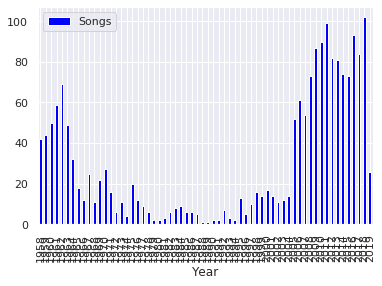

In [40]:
#yearInstanceDF = pd.DataFrame(yearToInstance, columns = ['Year', 'Songs'])
#print(list(yearToInstance.keys()))
data = {'Year': list(yearToInstance.keys()), 'Songs': list(yearToInstance.values())}
yearInstanceDF = pd.DataFrame(data)
yearInstanceDF = yearInstanceDF.sort_values("Year")
print(yearInstanceDF)
yearInstanceDF.plot(kind='bar', x= 'Year', y='Songs', color='blue')
plt.savefig('YEARSxMUL_INSTANCES')
#pltcm.register_cmap(name='swirly', cmap=swirly_cmap)
plt.show()
#yearInstanceDF['Songs'].hist(bins=50)
#x axis is years; y axis is number of songs that have more than one instance. Songs that are extremely popular by this metric thus are common as time becomes more recent. 

This data illustrates the mapping of each year (on the x axis) to the number of songs with more than one instance of appearing on the Billboard Weekly Top 100. Songs that are extremely popular by this metric are therefore becoming increasingly more common as time goes on, as demonstrated by the sharp rise since the mid-1970s (in which appeared very few songs with more than one instance). 

Another factor at play here is the resurgence of many songs, as mainstream fascination with past culture has seen a heighted presence in recent years. For instance, popular songs by ABBA and The Beatles have had resurgences in recent years, demonstrating the enduring nature of music and artists who have remained relevant to the public eye. 

An additional factor in recurring songs is that holiday songs, such as Christmas or Halloween songs, have a sharp seasonal ebb and flow that would lend themselves toward higher representation on these lists. Because they regain spots on the list seasonally, they would be more highly represented here than a song that is extremely popular but fades in popularity eventually without resurgence.

Factors to explore in the future include the high density of songs that have seen resurgences peaking in the early 1960s.


In [41]:
# list of songs that have been popular for more than a year        
popularSongs = []
for pair1 in dictSortIndex:
    tempSum = 0
    for pair2 in dictSortIndex[pair1]:
        tempSum = tempSum + dictSortIndex[pair1][pair2]
    if tempSum >= 51:
        popularSongs.append(pair1)
# percentage of songs that have been popular for more than a year vs. total songs
popularMoreThan1Yr = ((len(popularSongs))/(len(dictSortIndex.keys())))

# songs that have been #1 & were popular for more than a year
superPopular = []
for song in peakList:
    if song in popularSongs:
        superPopular.append(song)
print(superPopular)

["Can't Stop The Feeling!Justin Timberlake", 'Shape Of YouEd Sheeran', 'I Will Always Love YouWhitney Houston', 'I Gotta FeelingThe Black Eyed Peas', 'CloserThe Chainsmokers Featuring Halsey', 'See You AgainWiz Khalifa Featuring Charlie Puth', 'Monster MashBobby "Boris" Pickett And The Crypt-Kickers', 'I Like ItCardi B, Bad Bunny & J Balvin', 'SmoothSantana Featuring Rob Thomas', 'Somebody That I Used To KnowGotye Featuring Kimbra', 'Girls Like YouMaroon 5 Featuring Cardi B', 'DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber', 'Dark HorseKaty Perry Featuring Juicy J', 'Too CloseNext', 'Truly Madly DeeplySavage Garden', 'Uptown Funk!Mark Ronson Featuring Bruno Mars', 'Viva La VidaColdplay', 'Party Rock AnthemLMFAO Featuring Lauren Bennett & GoonRock', "That's What I LikeBruno Mars", 'PerfectEd Sheeran', 'Rolling In The DeepAdele', 'Red Red WineUB40', 'AmazedLonestar', 'All Of MeJohn Legend', 'Set Fire To The RainAdele', 'The TwistChubby Checker', "Just DanceLady Gaga Featuring

In [42]:
len(billboardWeekly["SongID"].unique())

28193

In [43]:
# fig1: all songids
#billboardWeekly.iloc[billboardWeekly['Instance'] > 1]['Year']
#fig1 = billboardWeekly.loc[billboardWeekly['Instance'] > 1]['Year'].hist()
#fig1 = plt.gcf()
yearInstanceDF['Year']
#yearInstance20DF = yearInstanceDF.loc[yearInstanceDF['Year'] < 2000]
#print(yearInstanceDF20)
#yearInstanceDF.plot(kind='bar', x= 'Year', y='Songs', color='blue')
#plt.savefig('YEARSxMUL_INSTANCES')
#pltcm.register_cmap(name='swirly', cmap=swirly_cmap)
#plt.show()

0     1958
37    1959
20    1960
11    1961
10    1962
      ... 
24    2015
7     2016
18    2017
9     2018
32    2019
Name: Year, Length: 62, dtype: object